In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

Question_1

In [10]:
# equalization function
def histogram_equalization(img):
    # calculate the histogram of input image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # avoid zero value in the CDF
    cdf_masked = np.ma.masked_equal(cdf, 0)
    
    # normalize CDF -> let value project to [0. 255]
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    
    # let initial masked = 0
    cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')
    
    # project each pixel to a new value using the normalized CDF
    img_equalized = cdf_final[img]
    return img_equalized


In [32]:
# plot hist & cdf function
def hist_and_cdf_plot(img):
    # calculate the histogram of input image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # normalize CDF 
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    
    # plot
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(), 256, [0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')

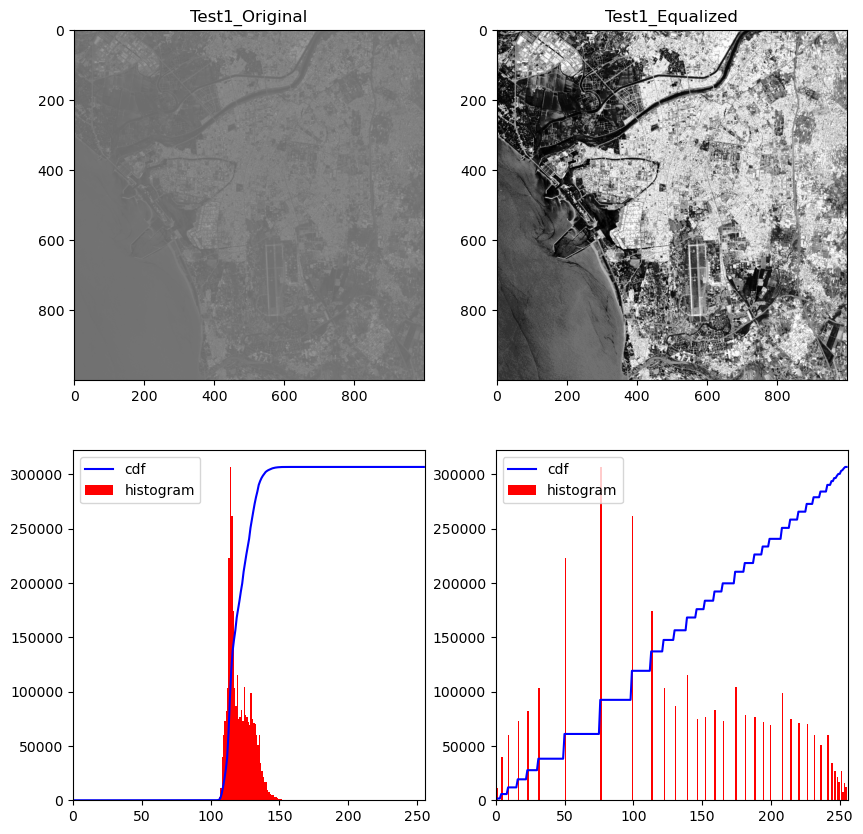

In [15]:
# read image
img_1 = cv2.imread("image\Histogram equalization_Test1.bmp")

# images equalization
img_1_equalized = histogram_equalization(img_1)

# plot images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Test1_Original')
plt.imshow(img_1, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Test1_Equalized')
plt.imshow(img_1_equalized, cmap='gray')

# plot hist & cdf
plt.subplot(2, 2, 3)
hist_and_cdf_plot(img_1)

plt.subplot(2, 2, 4)
hist_and_cdf_plot(img_1_equalized)

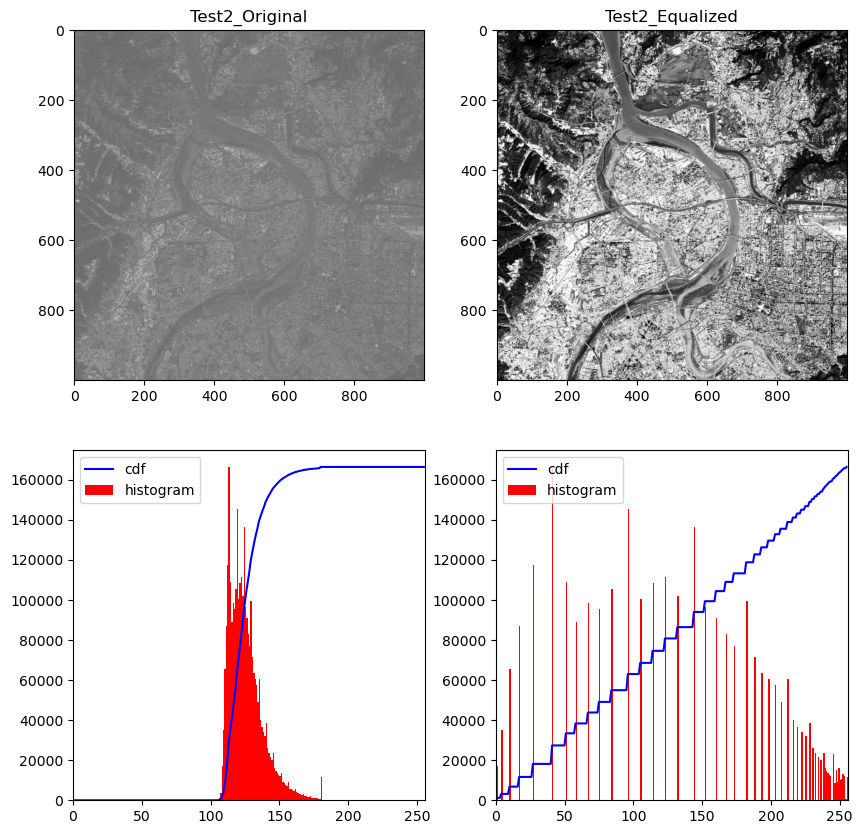

In [17]:
# read image
img_2 = cv2.imread("image\Histogram equalization_Test2.bmp")

# images equalization
img_2_equalized = histogram_equalization(img_2)

# plot images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Test2_Original')
plt.imshow(img_2, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Test2_Equalized')
plt.imshow(img_2_equalized, cmap='gray')

# plot hist & cdf
plt.subplot(2, 2, 3)
hist_and_cdf_plot(img_2)

plt.subplot(2, 2, 4)
hist_and_cdf_plot(img_2_equalized)

Question_3

In [20]:
# calculate cdf
def cdf_cal(img):
    # calculate the histogram of input image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # normalize CDF -> let value project to [0, 1]
    cdf_normalized = cdf / cdf[-1]
    return cdf_normalized

In [21]:
# build a project relationship between the source and target CDFs.
def creat_project_relationship(source_cdf, target_cdf):
    
    project_table = np.zeros(256)
    
    j = 0
    for i in range(256):
        while j < 255 and target_cdf[j] < source_cdf[i]:
            j += 1
        project_table[i] = j
        
    return project_table

In [24]:
# matching function
def histogram_matching(source_img, target_img):
    
    matched_img = np.zeros_like(source_img)
    
    for channel in range(source_img.shape[2]):
        # process each channel(RGB) separately
        source_channel = source_img[:, :, channel]
        target_channel = target_img[:, :, channel]
        
        # calculate each channel's cdf
        source_cdf = cdf_cal(source_channel)
        target_cdf = cdf_cal(target_channel)
        
        # build a project relationship from the source and target CDFs
        project_table = creat_project_relationship(source_cdf, target_cdf)
        
        # project the pixel value from the source channel to the target channel
        matched_img[:, :, channel] = project_table[source_channel].astype(np.uint8)
        
    return matched_img

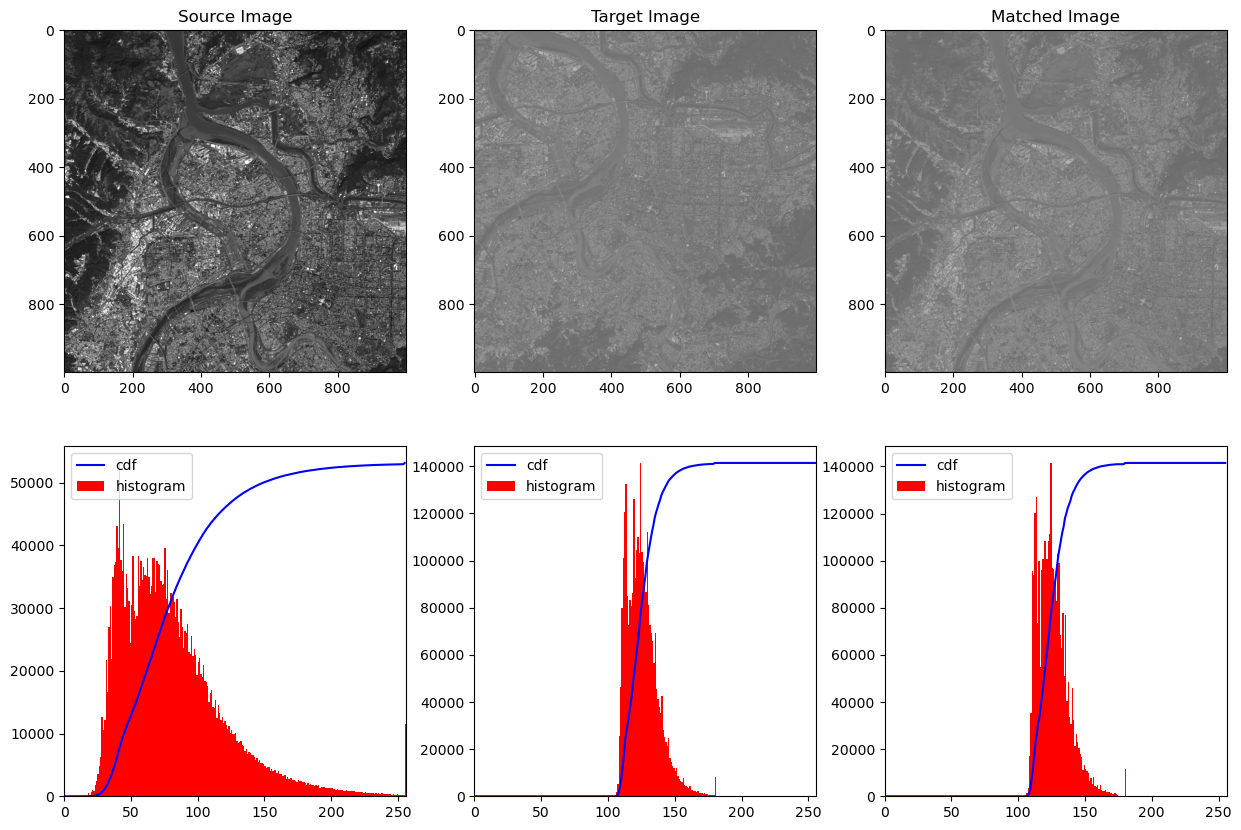

In [36]:
# read images and convert to RGB format
source_img = cv2.imread('image\Histogram Matching Test1\Taipei_1000x1000_01.bmp')
target_img = cv2.imread('image\Histogram Matching Test1\Taipei_1000x1000_02_LowConstrast.bmp')

source_img_rgb = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

# matching images
matched_image = histogram_matching(source_img_rgb, target_img_rgb)

# plot the result of matching
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Source Image')
plt.imshow(source_img_rgb)

plt.subplot(2, 3, 2)
plt.title('Target Image')
plt.imshow(target_img_rgb)

plt.subplot(2, 3, 3)
plt.title('Matched Image')
plt.imshow(matched_image)

# plot the hist of matching images
plt.subplot(2, 3, 4)
hist_and_cdf_plot(source_img_rgb)

plt.subplot(2, 3, 5)
hist_and_cdf_plot(target_img_rgb)

plt.subplot(2, 3, 6)
hist_and_cdf_plot(matched_image)

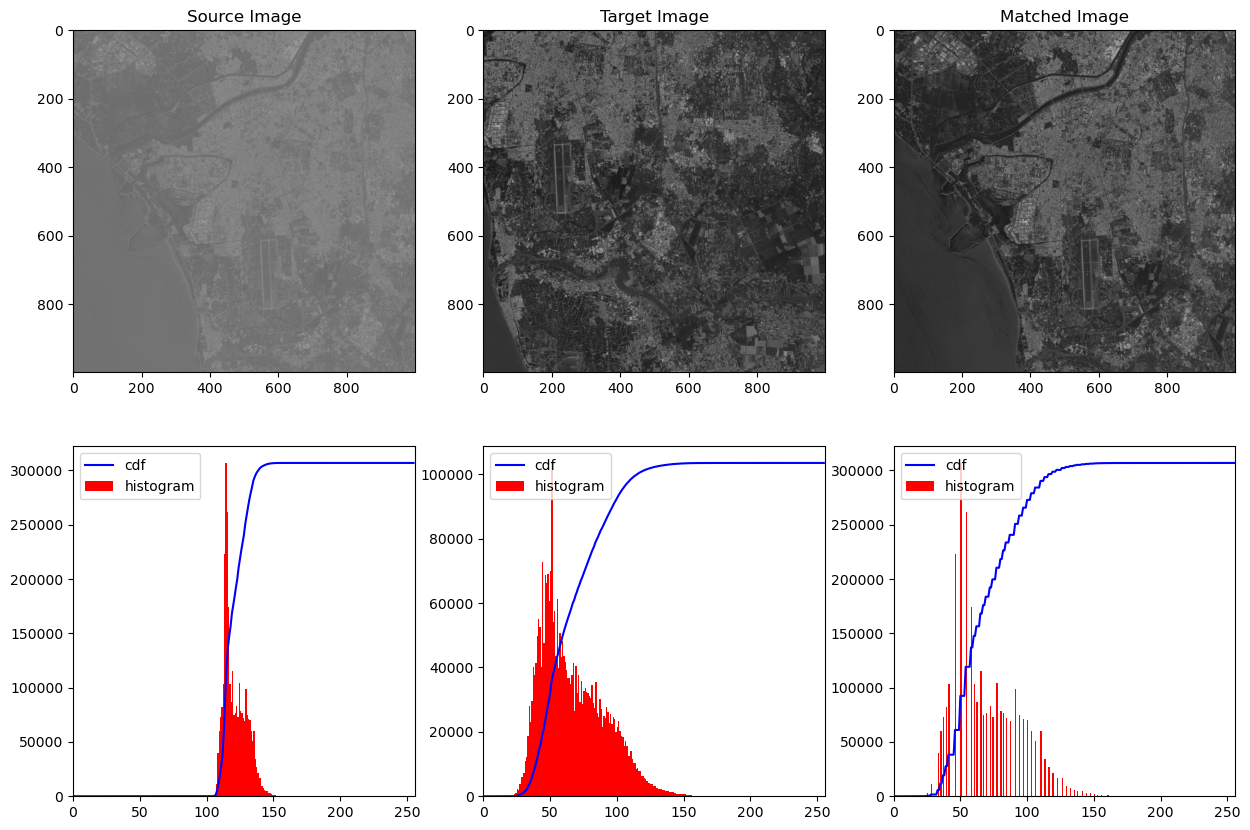

In [37]:
# read images and convert to RGB format
source_img = cv2.imread('image\Histogram Matching Test2\Tainan_1000x1000_01_LowContrast.bmp')
target_img = cv2.imread('image\Histogram Matching Test2\Tainan_1000x1000_02.bmp')

source_img_rgb = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

# matching images
matched_image = histogram_matching(source_img_rgb, target_img_rgb)

# plot the result of matching
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Source Image')
plt.imshow(source_img_rgb)

plt.subplot(2, 3, 2)
plt.title('Target Image')
plt.imshow(target_img_rgb)

plt.subplot(2, 3, 3)
plt.title('Matched Image')
plt.imshow(matched_image)

# plot the hist of matching images
plt.subplot(2, 3, 4)
hist_and_cdf_plot(source_img_rgb)

plt.subplot(2, 3, 5)
hist_and_cdf_plot(target_img_rgb)

plt.subplot(2, 3, 6)
hist_and_cdf_plot(matched_image)